Please fill out the feedback form:

https://docs.google.com/forms/d/e/1FAIpQLScORHXiMgjvLJDl35SFPA1uXF8J8kSMxV6SkcZSQBRvyhj0CA/viewform?usp=sf_link

And now for something completely different...

# Python for mathematics, science and engineering
https://scipy.org/

## Numpy
`numpy` is a `python` package

* linear algebra, Fourier transform and random numbers
* easy-to-use matrices, arrays, tensors
* optimized
* C/C++/Fortran integration is possible (if optimization is not enough)

<div align=center><i>"Numpy is the MatLab of python!"</i></div>

In [4]:
import numpy

We will use the following for plotting.

In [61]:
%matplotlib inline
import matplotlib.pyplot

Numpy uses an underlying [BLAS](http://www.netlib.org/blas/) library, just as MatLab does. These libraries harvests the vectorization.
* Anaconda uses IntelMKL (Intel's proprietary math library)
* If you install numpy manually, and you have previously installed [OpenBLAS](http://www.openblas.net/) (free, opensource), then numpy will use that.

In [ ]:
numpy.show_config()

### First steps

The core object of `numpy` is the `numpy.ndarray` (_$n$-dimensional array_).

In [ ]:
A = numpy.array([[1, 2], [3, 4]])

print(A.shape, A.dtype)

The `shape` is a tuple with the length of the number of dimensions. The i<sup>th</sup> element of the `shape` is the length of dimension $i$.

The above is a $2\times 2$ matrix. You can access its elements with `[]`. One index in one bracket, or with several indices.

In [ ]:
print(A[0, 0], A[0, 1], A[1, 0], A[1, 1])
print(A[0])
print(A[0][0])

In general, an $n$-dimensional array requires $n$ indices to access its scalar elements.

In [ ]:
B = numpy.array([[[1, 2, 3],[4, 5, 6]]])
print(B.shape)
print()
print(B[0])
print(B[0, 1])
print(B[0, 1, 2])

### under the hood

The default array representation is C style ([row-major](https://en.wikipedia.org/wiki/Row-_and_column-major_order)) indexing. But you cannot rely on the representation, it is advised not to use the low level C arrays!

In [ ]:
print(B.strides)
print(B.flags)

### Operations on arrays

Arithmetic operators are overloaded, they act element-wise.

In [ ]:
P = A > 2
print(P)
print(P.dtype)

In [ ]:
print(A + A)
print()
print(A * A)

In [ ]:
print(numpy.exp(A))
print(2**A)
print(1/A)

Functions like `dot`, `inv`, `pinv` are not element wise, but matrix algebraic operations.

In [ ]:
print(A.dot(A))
print(numpy.linalg.inv(A))

Also, there is a `matrix` class for which `*` acts as a matrix product.

In [ ]:
M = numpy.matrix([[1, 2], [3, 4]])
print(numpy.multiply(M, M))
print(M * M)

### Casting
In `python` float and integer representation is fixed, in `numpy` you can use C types.

In [ ]:
P.astype(int)

In [ ]:
(-P.astype(int)).astype("uint32")

In [ ]:
numpy.array([[1, 2], [3, 4]], dtype="float32")

In [ ]:
T = numpy.array(['a', 'text'])
print(T)
print(T.shape)

Directly converts strings to numbers

In [ ]:
numpy.float32('-10')

Use the cast on arrays

In [ ]:
numpy.array(['10', '20'], dtype="float32")

### Slicing, advanced indexing
One can slice a sub-array from an array.

Use `:` for retrieving the full size along that dimension.

In [ ]:
A = numpy.array([[1, 2, 3], [4, 5, 6]])
print(A[0])
print(A[0, :]) # first row
print(A[:, 0])  # first column

These are 1D vectors, neither $1\times n$ nor $n\times1$ matrices!

In [ ]:
print(A[0, :].shape, A[:, 0].shape)

In [ ]:
print(B[:, 1, :])
print(B[:, 1, :].shape)

All python range indexing also work, like reverse:

In [ ]:
print(A[:, ::-1])
print(A[::-1, :])
print(A[:, ::2])

_Advanced indexing_ is when the index is a list.

In [ ]:
print(numpy.array(range(5))[[0, 2]])
print(B[0, 0, [0,2]])
B[0, :, [0,2]] # first and third "column"

If indices are all lists:
<div align=center>B[$i_1$, $i_2$, $\ldots$].shape = (len($i_1$), len($i_2$), $\ldots$)</div>

The size of a particular dimension remains when the corresponding index is a colon (`:`).

If an index is a scalar then that dimension disappears from the shape of the output.

One can use a one-length list in advanced indexing. In that case, the number of dimensions remains but the size of that dimension becomes one.

In [ ]:
print(B[:, :, 2].shape)
print(B[:, :, 2])
print()
print(B[:, :, [2]].shape)
print(B[:, :, [2]])

### Change shape
The shape of an array can be modified with `reshape`, as long as the number of elements remains the same. The underlying elements are unchanged and not copied in the memory.

In [ ]:
print(B.reshape((2, 3)))
print()
print(B.reshape((3, 2)))

In [ ]:
numpy.array(range(6)).reshape((2, 3))

The size `-1` can be used to span the resulted array as much as it can in that dimension.

In [ ]:
X = numpy.array(range(12)).reshape((2, -1, 2))
print("shape", X.shape, ":")
print(X)

In [ ]:
X.reshape((5, -1))

`resize` deletes elements or fills with zeros but it works only _inplace_.

In [ ]:
Y = X.copy()
Y.resize((5, 3))
print(Y)

However, `numpy.resize` (not a member) works differently

In [ ]:
numpy.resize(X, (5, 3))

### Constucting arrays

useful functions:
* `arange`: range
* `linspace`: equally divided interval
* `ones`, `ones_like`, array filled with ones
* `zeros`, `zeros_like`, array filled with zeros
* `eye`: identity matrix, only 2D

`numpy.ones_like()` ans `numpy.zeros_like()` keeps shape and `dtype`!

In [ ]:
R = numpy.arange(10, dtype="int8")
print(R)
R = R.reshape((1, -1))
print(R)
R = R.reshape((-1, 1))
print(R)
numpy.zeros_like(R)

In [ ]:
print(numpy.eye(5))
print(numpy.eye(5, dtype=bool))

there is no `numpy.eye_like`, but you can use the following:

In [ ]:
numpy.eye(*A.shape, dtype=A.dtype)

#### Concatenation
The axis to concatenate sums the size of the dimensions in that axis. The other axis should be all equal.

In [ ]:
print(numpy.concatenate([A, A], axis=1))
print(numpy.concatenate([A, A], axis=0))
print(numpy.concatenate([B, B], axis=2))

In [ ]:
print(numpy.concatenate([numpy.ones((1,2,3)), numpy.ones((1,5,3)), numpy.ones((1,3,3))], axis=1).shape)

Block matrix

In [ ]:
numpy.concatenate([numpy.concatenate([numpy.ones((2,2)), numpy.zeros((2,2))], axis=1), numpy.concatenate([numpy.zeros((2,2)), numpy.ones((2,2))], axis=1)], axis=0)

#### Stack

`stack` puts the arrays next to each other, using a new dimension. Each array must have the same shape.

In [ ]:
for i in [0, 1, 2]:
    X = numpy.stack([numpy.ones((3,2)), numpy.zeros((3,2))], axis=i)
    print(X)
    print(X.shape)
    print()

### Iteration
By default, iteration takes place in the first (outermost) dimension.

In [ ]:
for row in A:
    print(row)

But you can slice the desired elements for a loop.

In [ ]:
print(B[0, 0, :])
print()
for x in B[0, 0, :]:
    print(x)

In [ ]:
print(B[0, 0, :].reshape((1, 1, -1)))
for row in B[0, 0, :].reshape((1, 1, -1)):
    print(row)

You can iterate through the elements themselves.

In [ ]:
for a in B.flat:
    print(a)

### Broadcasting
One can calculate with uneven shaped arrays if their shapes satisfy certain requirements.

For example a $1\times 1$ array can be multiplied with matrices, just like a scalars times a matrix.

In [ ]:
s = 2.0 * numpy.ones((1,1))
print(s)
s*A

Also, you can multiply a one-length vector to a matrix, or a zero dimensional array (scalar) to any dimensional array.

In [ ]:
print(numpy.ones((1,)) * A)
numpy.ones(()) * B

However you cannot perform element-wise operations on uneven sized dimensions:

In [ ]:
numpy.ones((2,3)) + numpy.ones((3,2))

This behavior is defined via _broadcasting_. If an array array has a dimension of length one, then it can be _broadcasted_, which means that it can span as much as the operation requires (operation other than indexing).

In [ ]:
print(numpy.arange(3).reshape((1,3)) + numpy.zeros((3,3)))
print(numpy.arange(3).reshape((3,1)) + numpy.zeros((3,3)))

More than one dimension can be broadcasted at a time.

In [ ]:
print(numpy.arange(3).reshape((1,3,1)) + numpy.zeros((3,3,3)))

#### Theory

Let's say that an array has a shape `(1, 3, 1)`, which means that it can be broadcasted in the first and third dimension.
Then the index triple `[x, y, z]` accesses its elements as `[0, y, 0]`. In one word, broadcasted dimensions are omitted in indexing.

One can broadcast non-existent dimensions, like a one-dimensional array (vector) can be broadcasted together with a three dimensional array.

In terms of shapes: `(k,) + (i, j, k)` means that a vector plus a three dimensional array (of size i-by-j-by-k). The index `[i, j, k]` of the broadcasted vector degrades to `[k]`.

Let's denote the broadcasted dimensions with `None` and the regular dimensions with their size. For example shapes `(2,) + (3, 2, 2)` results the broadcast `(None, None, 2) + (3, 2, 2)`. False dimensions are prepended at the front, or in the place of 1-length dimensions.

<div align=center>`(2,) + (3, 2, 2) -> (None, None, 2) + (3, 2, 2) = (3, 2, 2)` <br>
but<br>
`(3,) + (3, 2, 2) -> (None, None, 3) + (3, 2, 2)`
</div>
and the latter is not compatible.

In [ ]:
def test_broadcast(x, y):
    try:
        A = numpy.ones(x) + numpy.ones(y)
    except:
        return "WRONG"
    return A.shape

print(test_broadcast((3), (3,2,2)))
print(test_broadcast((2), (3,2,2)))
print(test_broadcast((3,1,1), (3,2,2)))

You can force the broadcast if you allocate a dimension of length one at a certain dimension (via `reshape`) or explicitly with the keyword `None`.

In [ ]:
(numpy.ones(3)[:, None, None] + numpy.ones((3,2,2))).shape

In shapes: `(3, None, None) + (3, 2, 2) = (3, 2, 2)`

In the former examples:
* `A1 = (1, 3) + (3, 3)` then the result can be expressed as `[i, j] = [0, j] + [i, j]` which means that the `[i, j]` index of the result is the sum of the `[0, j]` index of the first operand and the `[i, j]` index of the second operand.
* `A2 = (3, 1) + (3, 3)` results ` [i, j] = [i, 0] + [i, j]`
* and `A3 = (3,) + (3, 3)` results `[i, j] = [j] + [i, j]`

#### Example
One liner to produce a complex "grid".

In [ ]:
numpy.arange(5)[:, None] + 1j*numpy.arange(5)[None, :]

Due to the default behavior, a vector behaves as a row vector and acts row-wise on a matrix.

`(n,) -> (None, n)`

In [ ]:
numpy.arange(5) + numpy.zeros((5,5))

This behavior does not apply to non-element-wise operations, like `dot` product.

### Reductions

Sum over an axis

In [ ]:
Y = numpy.arange(24).reshape(2,3,4)
print(Y)
print("------------------")
print(Y.sum(axis=0))
print("------------------")
print(Y.sum(axis=1).sum(0))
print("------------------")
print(Y.sum())

This is a vector dot product (element-wise product and then sum):

In [ ]:
def my_vec_dot(x, y):
    return (numpy.array(x)*numpy.array(y)).sum()

my_vec_dot([1, 2, 3], [1, 2, 3])

This is a matrix dot product:

In [ ]:
def my_mat_dot(x, y):
    #            sum_j           x_{i, j,  -  }             y_{  - , j, k}
    return numpy.sum(numpy.array(x)[:, :, None]*numpy.array(y)[None, :, :], axis=1)

my_mat_dot([[1, 2], [3, 4]], [[1, 2], [3, 4]])

More about `ufunc`: https://docs.scipy.org/doc/numpy/reference/ufuncs.html

### Random numbers
`numpy.random.rand` Its arguments are the shape of the resulted random array of uniform $[0,1)$ elements. Its type is `float64`, you can cast it afterwards.

In [ ]:
numpy.random.rand(2,3).astype("float32")

Other distributions:

In [ ]:
numpy.random.uniform(1,2,(2,2))

In [ ]:
numpy.random.standard_normal(10)

In [ ]:
numpy.random.normal(0, 1, size=(1,10))

Descrete randoms:

In [ ]:
print(numpy.random.choice(["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"], 5, replace=False))

`choice` accepts custom probabilities:

In [ ]:
numpy.random.choice(range(1,7), 10, p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5])

In [ ]:
print(numpy.random.permutation(["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]))

`permutation` permutes the first (outermost) dimension.

In [ ]:
print(numpy.random.permutation(numpy.arange(9).reshape((3, 3))))

## Excersises
### 1.
Implemet softmax. Softmax is a vector-vector function such that
$$
x_i \mapsto \frac{\exp(x_i)}{\sum_{j=1}^n \exp(x_j)}
$$
Avoid using for loops, use vectorization. The solution below is a _bad_ solution.

In [8]:
def softmax(X):
    return numpy.exp(X)/numpy.sum(numpy.exp(X))
print(softmax([-1,0,1]))
print(numpy.sum(softmax([-1,0,1])))

[ 0.09003057  0.24472847  0.66524096]
1.0


### 2.
Write a function which has one parameter, a 2D array and it returns a vector of row-wise Euclidean norms of the input. Use `numpy` operations and vectorization, avoid `for` loops. The solution below is a _bad_ solution.

In [14]:
def rowwise_norm(X):
    return numpy.sqrt(numpy.sum(numpy.square(X), axis=1))
    
X = numpy.arange(5)[:, None]*numpy.ones((5, 3));
print(X)
print(rowwise_norm(X))
print(rowwise_norm([[1], [-1], [1], [-1]]))

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]]
[ 0.          1.73205081  3.46410162  5.19615242  6.92820323]
[ 1.  1.  1.  1.]


### 3.
Write a function which has one parameter, a positive integer $n$, and returns an $n\times n$ array of $\pm1$ values like a chessboard: $M_{i,j} = (-1)^{i+j}$.

Use `numpy` operations, avoid `for` loops!

In [58]:
def chessboard(n):
    a = numpy.matrix((-1)**numpy.arange(n))
    return a.T * a

print(chessboard(10))

[[ 1 -1  1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1 -1  1]]


### 4.*
Write a function which numerically derivates a $\mathbb{R}\mapsto\mathbb{R}$ function. Use the forward finite difference.

The input is a 1D array of function values, and optionally a 1D vector of abscissa values. If not provided then the abscissa values are unit steps.

The result is a 1D array with the length of one less than the input array.

Use `numpy` operations instead of `for` loop in contrast to the solution below.

In [89]:
def derivate(f, x=None):
    if x is None:
         x = numpy.arange(len(f))
    return numpy.diff(f) / numpy.diff(x)

print(derivate(numpy.arange(10)**2))

[  1.   3.   5.   7.   9.  11.  13.  15.  17.]


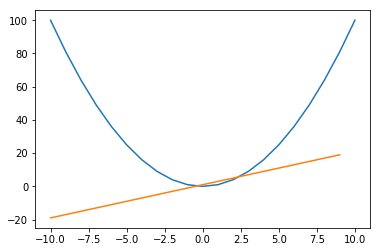

In [90]:
x = numpy.arange(-10,11)
matplotlib.pyplot.plot(x, x**2)
matplotlib.pyplot.plot(x[:-1], derivate(x**2, x))

### 4. b)
Make a random (1D) grid and use that as abscissa values!

### 5.*
Implement the [Horner's method](https://en.wikipedia.org/wiki/Horner%27s_method#Description_of_the_algorithm) for evaluating polynomials. The first input is a 1D array of numbers, the coefficients, from the constant coefficient to the highest order coefficent. The second input is the variable $x$ to subsitute. The function should work for all type of variables: numbers, arrays; the output should be the same type array as the input, containing the elementwise polynomial values.

In [ ]:
def horner(C, x):
    y = numpy.zeros_like(x)
    # YOUR CODE COMES HERE
    return y

In [ ]:
C = [2, 0, 1] # 2 + x^2
print(horner(C, 3))
print(horner(C, [3, 3]))
print(horner(C, numpy.arange(9).reshape((3,3))))

With a slight modofication, you can implement [matrix polinomials](https://en.wikipedia.org/wiki/Matrix_polynomial)!

### 6.*
Plot the $z\mapsto \exp(z)$ complex function on $[-2, 2]\times i [-2, 2]$. Use `matplotlib.pyplot.imshow` and the red and green color channgels for real and imaginary parts.